# Group


In [1]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Bar


In [2]:
mpg = pd.read_csv("data/mpg.csv")
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
mpg_group = (
    mpg.loc[:, ["cty", "manufacturer"]].groupby("manufacturer").agg({"cty": np.mean})
)
mpg_group.sort_values("cty", inplace=True)
mpg_group.reset_index(inplace=True)
mpg_group.head()


,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


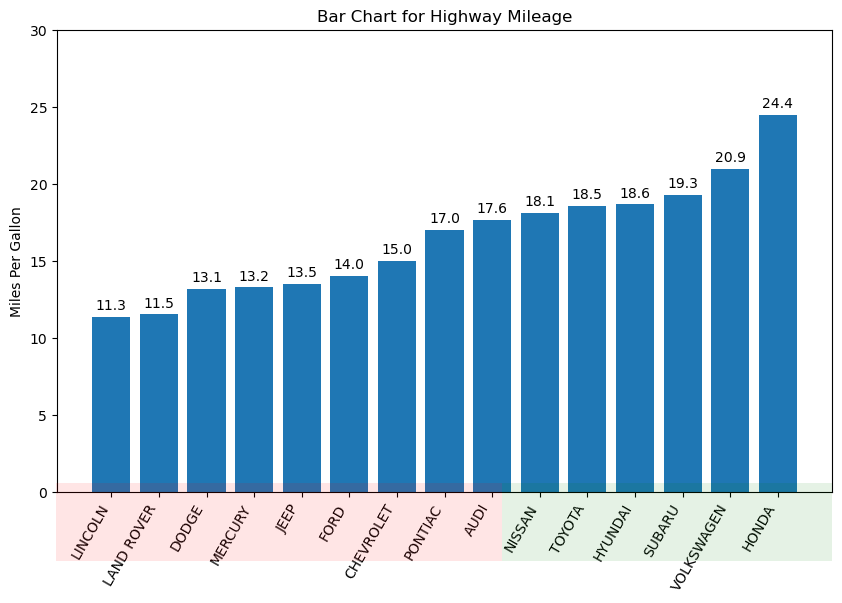

In [4]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

x = mpg_group["manufacturer"].str.upper()
y = mpg_group["cty"]

ax.bar(x=x, height=y)

for i, cty in enumerate(y):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment="center")

p1 = patches.Rectangle(
    (0.57, -0.005),
    width=0.33,
    height=0.13,
    alpha=0.1,
    facecolor="green",
    transform=fig.transFigure,
)
p2 = patches.Rectangle(
    (0.124, -0.005),
    width=0.446,
    height=0.13,
    alpha=0.1,
    facecolor="red",
    transform=fig.transFigure,
)
fig.add_artist(p1)
fig.add_artist(p2)

ax.set(ylim=(0, 30), ylabel="Miles Per Gallon", title="Bar Chart for Highway Mileage")
plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment="right")

plt.show()


## Dendrogram


In [5]:
from scipy.cluster import hierarchy


In [6]:
arrests = pd.read_csv("data/us_arrests.csv")
arrests.head()


,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


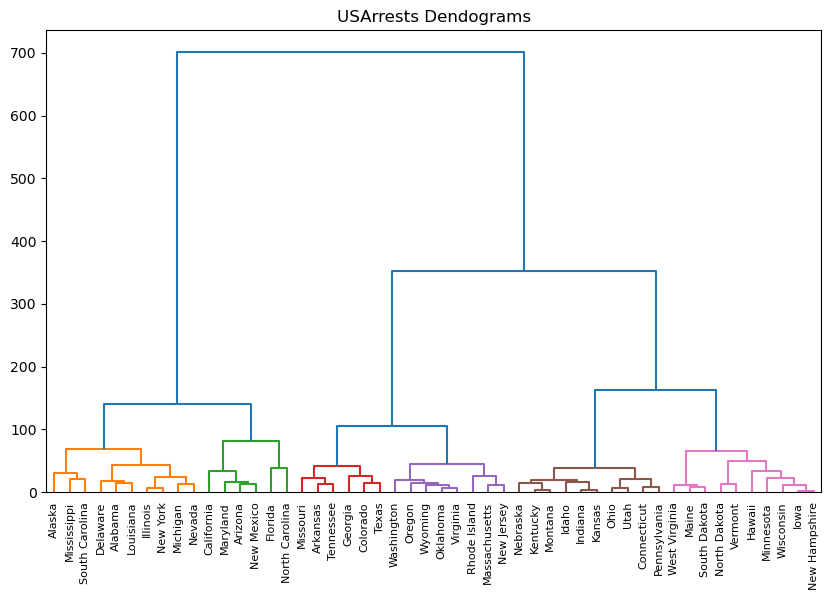

In [7]:
_, ax = plt.subplots(figsize=(10, 6))

dend = hierarchy.dendrogram(
    hierarchy.linkage(
        arrests[["Murder", "Assault", "UrbanPop", "Rape"]], method="ward"
    ),
    labels=arrests.State.array,
    color_threshold=100,
)

ax.set(title="USArrests Dendograms")
plt.show()


## Encircling


In [8]:
midwest = pd.read_csv("data/midwest_filter.csv")
midwest["popdensity"] = midwest["popdensity"] / 100
midwest["state"] = midwest["state"].astype("category")
midwest.head()


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,12.709615,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,7.590000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,6.814091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,18.121177,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,3.242222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [9]:
midwest_select = midwest.query("state=='IN'")
midwest_select.head()


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
83,663,ADAMS,IN,0.021,31095,14.807143,30530,36,42,60,...,4.862299,30490,98.054350,11.636602,17.194524,9.101888,8.714027,1,AAU,277.642023
84,665,BARTHOLOMEW,IN,0.022,63657,28.935000,61774,1005,97,610,...,6.844097,62784,98.628588,8.545171,10.736855,6.992420,10.811943,0,AAR,457.463283
85,666,BENTON,IN,0.024,9441,3.933750,9389,6,16,1,...,4.014538,9300,98.506514,8.043011,8.349218,6.842329,10.502283,0,AAR,139.244020
86,667,BLACKFORD,IN,0.010,14067,14.067000,13978,7,44,16,...,4.428124,13903,98.834151,9.853988,12.323745,8.332247,10.937500,0,AAR,268.221385
87,668,BOONE,IN,0.024,38147,15.894583,37814,83,90,94,...,8.813967,37402,98.047029,6.296455,8.021754,5.239599,7.089425,1,HLU,291.483110


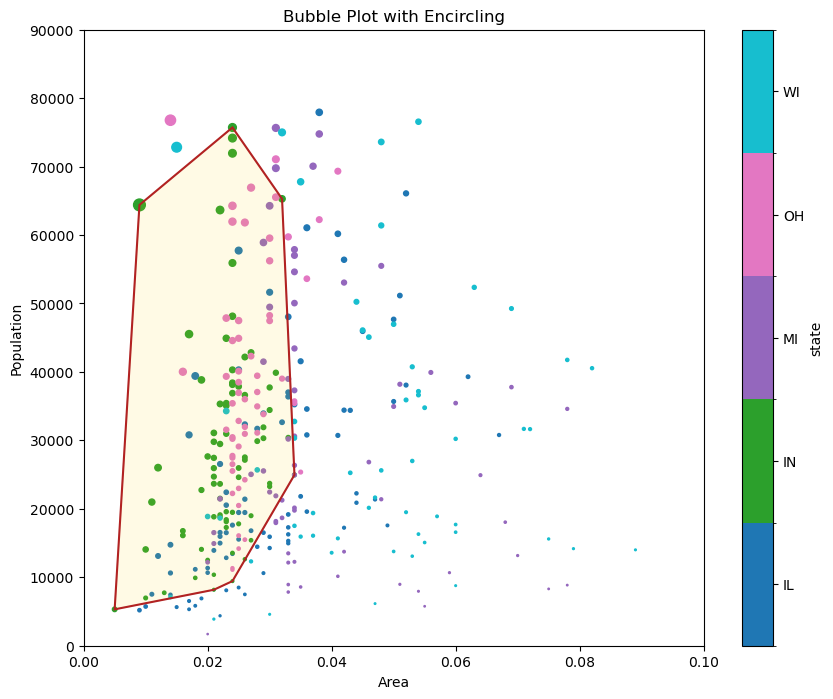

In [10]:
_, ax = plt.subplots(figsize=(10, 8))

midwest.plot.scatter(
    x="area", y="poptotal", c="state", s="popdensity", cmap="tab10", ax=ax
)


# Encircling
def encircle(x, y, ax=None, **kw) -> None:
    ax = ax or plt.gca()
    p = np.stack([x, y], axis=1)
    hull = ConvexHull(p)
    poly = patches.Polygon(xy=p[hull.vertices, :], closed=True, **kw)
    ax.add_patch(poly)


ax.set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
    xlabel="Area",
    ylabel="Population",
    title="Bubble Plot with Encircling",
)

x = midwest_select["area"]
y = midwest_select["poptotal"]

# Draw polygon surrounding vertices
encircle(x, y, ec="k", fc="gold", alpha=0.1, ax=ax)
encircle(x, y, ec="firebrick", fc="none", lw=1.5, ax=ax)

plt.show()

## Andrews Curve


In [11]:
from pandas.plotting import andrews_curves


In [12]:
mtcars = pd.read_csv("data/mtcars.csv")
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout


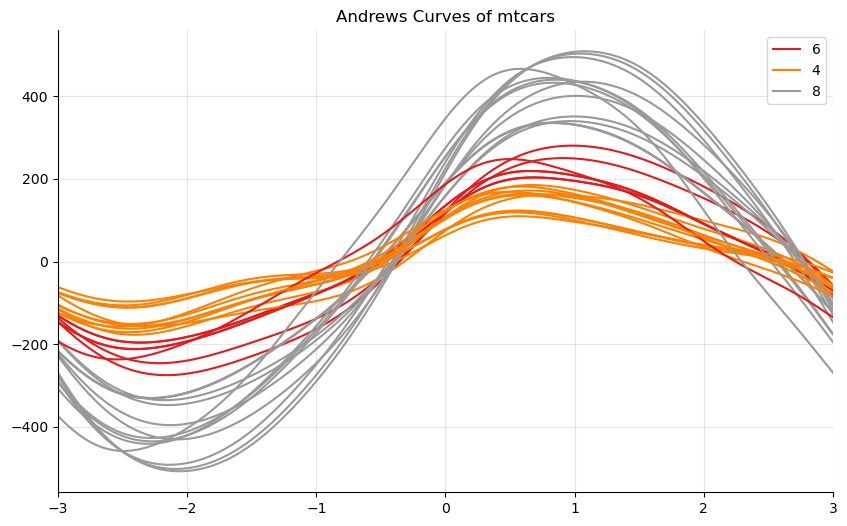

In [13]:
mtcars.drop(["cars"], axis=1, inplace=True)

_, ax = plt.subplots(figsize=(10, 6))

andrews_curves(mtcars, "cyl", colormap="Set1")

ax.spines[["top", "right"]].set_visible(False)

ax.set(title="Andrews Curves of mtcars", xlim=(-3, 3))
ax.grid(alpha=0.3)
plt.show()


## Parallel Coordinates


In [14]:
from pandas.plotting import parallel_coordinates


In [15]:
diamonds = pd.read_csv("data/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


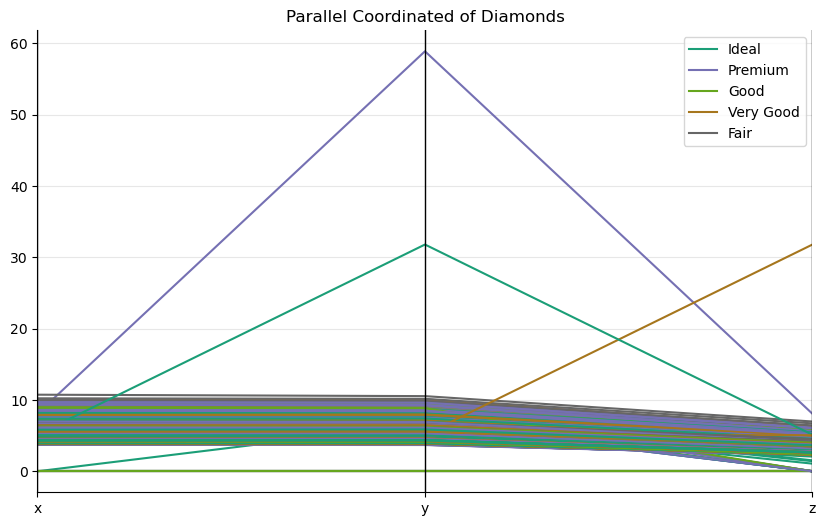

In [16]:
_, ax = plt.subplots(figsize=(10, 6))

parallel_coordinates(
    frame=diamonds.loc[:, ["cut", "x", "y", "z"]],
    class_column="cut",
    colormap="Dark2",
    ax=ax,
)

ax.spines[["top", "right"]].set_visible(False)
ax.set(title="Parallel Coordinated of Diamonds")
ax.grid(alpha=0.3)
plt.show()